# Lab 5: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

In this lab, we will make first steps in doing supervised learning. in particular, we will learn about the k-Nearest Neighbor (kNN) algorithm. kNN uses a simple idea: "you are what your neighbors are". This idea work quite well in data science. In the first part of the lab, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Lab 5.A: kNN Tutorial with Questions (30% of grade)

As usual, let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [2]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with attributes `data` (a 150x4 matrix, where $i$-th row are 4 attributes of the $i$-th flower), `feature_names` (the names of the 4 attributes -- remember that in data science "attribute" and "feature" means the same thing), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in data science people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [3]:
print(iris.DESCR)
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

So, we can see that the attributes of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In data science, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 attributes and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose attributes are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it.

<Figure size 432x288 with 0 Axes>

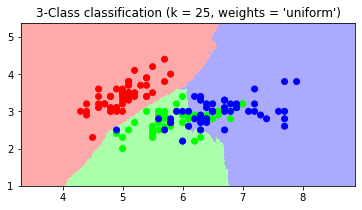

In [15]:
k = 25# how many nearest neighbors are consulted

X = iris.data[:, [0,1]]  # we only take the first two features. We could
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(k, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.figure(figsize=(6,3))   # this makes both axis equal 
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
plt.show()

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.

    The plot of predictions smooths out- there are less jagged borders between regions of different colors, and most of the outlier points (a lone point of one color in the midst of many points of another color) no longer have a small region of predictions of their color around them.
    The predictions take into account a little bit of the context around them rather than just the very nearest point, so they're less affected by outliers.

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

    The borders between regions of different predictions of the graph smooth out even more.
    The green prediction region in particular consolidates, eliminating almost all of the patches of blue predictions inside the green prediction region and shrinking the one blue patch which remains.

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.

    The weights parameter determines whether the algorithm treats all nearby data points as equally important when making a prediction or whether its prediction about some new point is more strongly influenced by training data points which are closest to the new point than by training data points which are only somewhat close to it.
    Changing the algorithm to weigh data points based on distance smooths out the prediction-region borders even further, and turns an island of blue near the green-blue border into a peninsula from blue into what had been green prediction territory when predictions were made with uniform weights.


### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

**Question 4**. What is the size of the resulting objects?

    X_train is a 100x2 array, X_test is a 50x2 array, y_train is a 100x1 array, and y_test is a 50x1 array

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Let us train the kNN predictor:

In [17]:
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [18]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print(x)
# predict its label
yhat = predictor.predict(x)
# compare predicted and true labels
print(list(zip(yhat,y_test[i])))

[[6.4 2.8]
 [6.2 2.8]
 [5.1 3.8]
 [5.8 2.7]]
[(2, 2), (1, 2), (0, 0), (2, 2)]


**Question 5**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 

    It did a decent job, getting three of the four correct.

**Question 6**. Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses

In [23]:
def gaugeAccuracy(X_test, y_test, predictor, testRangeSize):
    correctCount = 0
    indices = range(testRangeSize)
    x= X_test[indices, :]
    preds = predictor.predict(x)
    for i in range(testRangeSize):
        if preds[i] == y_test[i]:
            correctCount += 1
    return correctCount/testRangeSize



toyAccuracy = gaugeAccuracy(X_test, y_test, predictor, testRangeSize=4)
print(toyAccuracy)

0.75


**Question 7**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 6*.

In [24]:
fullAccuracy = gaugeAccuracy(X_test, y_test, predictor, len(y_test))
print(fullAccuracy)

0.64


Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 6 and 7):

In [ ]:
accuracy = predictor.score(X_test,y_test)
print(accuracy)

**Question 8**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

In [26]:
for k in [1,3,5,15,25,50]:
    predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
    predictor.fit(X_train, y_train);

    fullAccuracy = gaugeAccuracy(X_test, y_test, predictor, len(y_test))
    print("with k=", k, " accuracy= ", fullAccuracy)

with k= 1  accuracy=  0.64
with k= 3  accuracy=  0.62
with k= 5  accuracy=  0.7
with k= 15  accuracy=  0.74
with k= 25  accuracy=  0.74
with k= 50  accuracy=  0.74


    The highest accuracy was achieved with k=15,  25, or 50.
    This makes sense to me, because with a higher k value the predictor will consider more of the context and be less thrown off by a few outlier training data points that happen to be close to the test point.




**Question 9**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

    The remaining optional parameters to the KNeighborsClassifier constructor have to do with optimizing the search for nearest neighbors among the training data when doing predictions.
    There are several distinct algorithms for how to search through the training dataset and a 'leaf_size' parameter for tuning one of the tree-based algorithms.
    There are also several different definitions for distance between data points, specified by the 'metric' argument and potentially modified by the 'p' and 'metric_params' arguments.
    Finally, the 'n_jobs' parameter controls how aggressively the predictor may use system resources to paralellize (& so speed up) the search for nearest neighbors.    

## Lab 5.B Training kNN classifier on Iris and Wine Quality data (70% of grade)
In this part of the lab you will use your knowledge to train and test accuracy of kNN classifiers on Iris and Newsgroups data.

#### Iris Questions
In Lab 7.A you used only the first two attributes of Iris for prediction. You have 2 questions:

**Question Iris 1**. Train kNN classifier on other pair of attributes. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of attributes results in the highest accuracy?

**Question Iris 2**. Train kNN classifier using all 4 attributes. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?

#### Wine Quality Questions
Wine Quality data set can be accessed from the UCI Machine Learning Repository website at https://archive.ics.uci.edu/ml/datasets/Wine+Quality. In this lab you will be working with the white wine data set https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

**Question Wine 1** Perform EDA on the data set to get an insight into the data. Prepare 1 page pdf document summarizing the interesting aspects of the data. Upload the pdf file named WineEDA.pdf to Canvas.

**Question Wine 2**. Since kNN is a relatively slow algorithms, create your data set by picking 2,000 examples randomly. Pay attention that the 12th column in the data set (quality) should be your label (call it y) and the first 11 columns should be your attribues (call it X). Because y are numbers from 0-10, let us create a binary label by converting ratings 7 and below to 0 and ratings above 7 as 1. Split your data into 66% training and 33% test data sets. Train a kNN classifier ($k=3$ and defaults) on the training data and test its accuracy on test data. Record the computational time needed to run this. Report the accuracy.

**Question Wine 3**. Train a kNN classifier using different values of $k$ and any other different choice of hyperparameters, hoping to improve accuracy. Report the results.

**Question Wine 4** Pay attention that range of vallues for different attributes is quite different. *Question*: what is the impact of attributes with different ranges to kNN algorithm? In order to give each attribute equal change, scale each attribute to the same range to make sure the minimum is 0 and maximum is 1. *Question*: What is the formula to achieve this? Implement this formula and create a scaled data set (remember, any scaling you apply on the training data should also be used on the test data). Apply kNN and measure the accuracy. Did your accuracy improve?

**Question Wine 5** Instead of treating the last column (quality) as a class label, we can treat is as numeric output. In the original format, the numbers range from 0 to 10. If we want to predict that number, the problem becomes regression. As we covered in class, kNN can also be used for regression. It is also implemented by sklearn. Use sklearn to test the accuracy of knn regression. Remember that the formula for regression accuracy is average squared error, also called the Mean Squared Error (MSE). 

**Deliverables** Submit the 1-page pdf file for EDA. Also, submit this notebook (enhanced with needed code) with all answers (added as tect comments) and all executed code for all the questions.